In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv


In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 5.9 MB/s eta 0:00:00


## Importing Libraries

In [3]:
## Importing Libraries
import pandas as pd
import numpy as np

# import contractions
import spacy
from nltk.corpus import stopwords
import nltk
import contractions

nltk.download('stopwords')

# Load spaCy once outside
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # Disable unused components for speed
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#stopwords import check
stop_words = set(stopwords.words('english'))
print("Stopwords loaded:", len(stop_words))

Stopwords loaded: 198


In [5]:
# import chardet

# with open('/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv', 'rb') as file:
#     result = chardet.detect(file.read())
#     print(result)

## Reading the data

In [6]:
data = pd.read_csv('/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv',encoding='latin-1')

## Exploring the data

In [7]:
data.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [8]:
pd.set_option('display.max_colwidth',None)

In [9]:
data[['reviewer_id','review']].sample(n=10,random_state=None)

,reviewer_id,review
15846,15847,Pathetic and terrible experience...one cashier during lunch rush
13225,13226,"What you expect from McDonald's - cheap unhealthy fare. Went here to grab a late night bite. Got my order for a mango banana smoothie wrong, but replaced promptly."
30382,30383,"They're pretty fast, didnt have to wait in a parkingspot for the food like at many other McDonalds. They had it ready at the window. But the fries were luke warm and stale"
7579,7580,Just another M.
6959,6960,"Burger patties were served to us rare through the drive through. Both mine and my husbandï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s. I broke mine in half to show the picture.\n\nDidnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t find out until we got home, unable to go back out now. I tried calling just to let them know this issue may be reoccurring throughout the night but nobody answered the phone. Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï"
28058,28059,"Quarter pound CB although made correctly with no onions was raw in the middle (not noticed until my husband was already almost done eating) then he just threw it away, hopefully he does not get sick. Kids meal CB ordered with no onions (not rang up that way) was covered in onions! Lessons here: cook outs not being done to make sure on quality & not serving raw product & cashier needs a little more training....because when I ordered my CB kids meal with no onions & a Large diet cook as the drink. He did not put on there the no onions & then asked me what did I want to drink."
9194,9195,Never come back to this place again the french fries were hard and cold and so is a chicken nuggets
23300,23301,I didn't get much sugar for my coffee all milk and day getting served my Burger not my Burger my sausage mcmuffin didn't give it to me in the morning They got me for some money not a pleasant place to go when you hungry you want your food
3602,3603,"I ate in a very clean place and the ladies who serve are very friendly, even the security is very nice. He gave me the order, thanks, everything was fine."
4948,4949,Neutral


## Identifying the number of rows with special characters

In [10]:
import re

# Function to detect special characters (non-ASCII or mojibake)
def has_special_chars(text):
    if not isinstance(text, str):  # Handle non-string (e.g., NaN)
        return False
    # Matches non-ASCII (≥128) or common mojibake patterns
    return bool(re.search(r'[^\x00-\x7F]|\Ã|ð|�|\\x[0-9a-fA-F]{2}', text))

# Apply to review_text column
data['has_special_chars'] = data['review'].apply(has_special_chars)

# Count rows with special characters
num_special = data['has_special_chars'].sum()
print(f"Rows with special characters: {num_special} out of {len(data)}")
print(f"Percentage: {(num_special / len(data) * 100):.2f}%")

Rows with special characters: 3037 out of 33396
Percentage: 9.09%


In [11]:
data[['reviewer_id','review']][data['has_special_chars']==1].sample(n=10,random_state=None)

,reviewer_id,review
10197,10198,I go to this McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s a lot of times and never had a problem until tonight. I ordered a McMuffin like always but this time the quality was not there. The bread was hard to bite and not fresh at all. It seems like they just
19276,19277,worst location ever! EVERY SINGLE TIME they screw up my order - and the customer service sucks! Theyï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½r
21214,21215,What is it with McDonalds? I made an a order the cashier made a mistake told me to drive around again!\n\nI spoke to the Manager he waived the fee on the mix up of menu then we sat outside 15 minutes in Las Vegas heat waiting for the food.\n\nThis place may be good for a walk in not drive through.\n\nItï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s a simple order how are is it to get it right.\n\n2 stars due to waiv
9241,9242,First choice Everytime I wanna eat lol ï¿½ï¿½ï¿
10046,10047,"I had recently ordered a chicken sandwich combo 3 weeks back, mind you I havenï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t had it in 7 years because I knew any and All fast food is bad for the body. But baybeeee the day I opened my meal the chicken looked like a soggy wet pad with extra mayo & some green grass that looked like lettuce ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ but was soggy as well. The only thing I got to enjoy were my fries. I should have told them to run me my money back with a free ice cream but we all know they machines stay broke d"
24169,24170,"Please hire employees that actually want to work and like their job and smile this girl that just took my order with extremely long red Nails was very unpleasant. Do you follow a dress code in this establishment? Also this must be the saddest sundae i have ever received, half the Carmel was outside the cup! Maybe thatï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï"
14719,14720,"rude, slow, and canï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"
8898,8899,Itï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s sad when someone hates their job so bad that they canï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï
28591,28592,Everything is trash at the McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s there
28697,28698,"Went is using a mobile code and the lady at the register had not clue what she was doing , so I asked for a manager and she told me she was the manager . So I tryed to help her out telling her my code was for a 5$ meal and I would like to add a 4 piece nuggets to that ! She told me the total was 12$ so in my head Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½m like no way a 4 piece is 6 $ so I told her that was incorrect and she instead it wasnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t , so she does Somthing on the computer I pay and still missing my extra nuggets after I told her 4 times I would like a extra"


## Cleaning the special characters for further reviews

In [12]:
## looks like removing these special characters, the meaning is getting preserved
def remove_spl_characters(text):
    if not isinstance(text, str):  # Handle NaN or non-string
        return text
    # Keep only ASCII characters (remove anything ≥ 128, including emojis, accents, mojibake)
    return re.sub(r'[^\x00-\x7F]', '', text)

In [13]:
data['cleaned_review'] = data['review'].apply(remove_spl_characters)

In [14]:
data[['cleaned_review','review']][data['has_special_chars']==1].sample(n=10,random_state=None)

,cleaned_review,review
11511,Out of all carbonated drinks. This is Joe Biden,Out of all carbonated drinks. This is Joe Bidenï¿½ï¿½ï¿½ï¿½
3010,"Staff is very quick, efficient, and friendly here... never had an incorrect order before.\n\nSide note, I'm not sure of his name but thank you thank you thank you so much to the security guard that works here for returning my phone to me after it was just stolen along with everything else in my bag. Went that extra bit that is much more rarely seen these days... and getting that phone back meant so much more than he could've ever known- so once again, THANK YOUUUUUU!!","Staff is very quick, efficient, and friendly here... never had an incorrect order before.\n\nSide note, I'm not sure of his name but thank you thank you thank you so much to the security guard that works here for returning my phone to me after it was just stolen along with everything else in my bag. Went that extra bit that is much more rarely seen these days... and getting that phone back meant so much more than he could've ever known- so once again, THANK YOUUUUUU!! ï¿½ï"
6135,I had an awful experience at this location with one member of the security staff they hire to keep customers and employees,I had an awful experience at this location with one member of the security staff they hire to keep customers and employees ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿
21600,Silly Google... I can assure you I didn,Silly Google... I can assure you I didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½
29,First and last time I go to this location. Look at my receipt and what I got. Thats a plain sausage biscuit plus a double quarter pounder. I didn,First and last time I go to this location. Look at my receipt and what I got. Thatï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s a plain sausage biscuit plus a double quarter pounder. I didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½
16317,Literally the worst they literally never have working registers crazy wait times tonight they didnt have food?? They said they wouldnt have any food for another hr.. I work night shifts in the Area and they,Literally the worst they literally never have working registers crazy wait times tonight they didnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t have food?? They said they wouldnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t have any food for another hr.. I work night shifts in the Area and theyï¿½ï¿½
10159,"I recently went there having to use the restroom in a emergency, then they told me I have to purchase something saying it with a rude attitude, so I told them I left I wallet in my car can I please use it then Ill get my wallet and purchase something? They said no we dont ca","I recently went there having to use the restroom in a emergency, then they told me I have to purchase something saying it with a rude attitude, so I told them I left I wallet in my car can I please use it then Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ll get my wallet and purchase something? They said no we donï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½t ca"
4545,The counter was unfriendly and unwelcome,The counter was unfriendly and unwelcome ï¿½ï¿½
28791,"Really like this McDonald's , it's got a double drive through which is nice , fast service and luckily haven't had any issues with their ice cream machine being down","Really like this McDonald's , it's got a double drive through which is nice , fast service and luckily haven't had any issues with their ice cream machine being down ï¿½ï"
28436,All self service order\nTable delivery though,All self service order\nTable delivery though ï¿½ï¿½ï¿


In [15]:
data[['cleaned_review','review']][data['has_special_chars']==0].sample(n=10,random_state=None)

,cleaned_review,review
13342,Shared an enjoyable lunch with a friend on the patio. I had a quarter cheese and fries and diet Dr. Pepper.,Shared an enjoyable lunch with a friend on the patio. I had a quarter cheese and fries and diet Dr. Pepper.
13120,"First of all, you will have a Santa Monica price here. That means it's more expensive than other places for the same item in the menu. Secondly, the restaurant was full of homeless people which disturbed people's meal quite often with their shouting and cussing. Thirdly, the restroom is freaking filthy.","First of all, you will have a Santa Monica price here. That means it's more expensive than other places for the same item in the menu. Secondly, the restaurant was full of homeless people which disturbed people's meal quite often with their shouting and cussing. Thirdly, the restroom is freaking filthy."
9991,Excellent,Excellent
15077,Hot food excellent service,Hot food excellent service
26714,This McDonald's is garbage. Dirty. No soda. Only take orders from 1 of the 2 lanes. Nope.,This McDonald's is garbage. Dirty. No soda. Only take orders from 1 of the 2 lanes. Nope.
9183,"It was the only place open on Christmas morning to get coffee, you would think that McDonald's wood close so their employees could have a Christmas with their family.","It was the only place open on Christmas morning to get coffee, you would think that McDonald's wood close so their employees could have a Christmas with their family."
24783,Best McDonald's I've ever been too. Customize your favorite meals. Fresh delicious food and friendly staff who check in with your dinning experience. Much recommended to McDonald's lovers,Best McDonald's I've ever been too. Customize your favorite meals. Fresh delicious food and friendly staff who check in with your dinning experience. Much recommended to McDonald's lovers
19323,I went to a different McDonald's the one in New Jersey where my boyfriend lives it's good I would go all the way back over there for that juicy burger I had so mouth watery.,I went to a different McDonald's the one in New Jersey where my boyfriend lives it's good I would go all the way back over there for that juicy burger I had so mouth watery.
14641,Not to bad,Not to bad
1961,Very friendly fast service,Very friendly fast service


## Creating a sentiment label using rating column

In [16]:
data[['rating']].value_counts()

rating 
5 stars    10274
1 star      9431
4 stars     5787
3 stars     4818
2 stars     3086
Name: count, dtype: int64

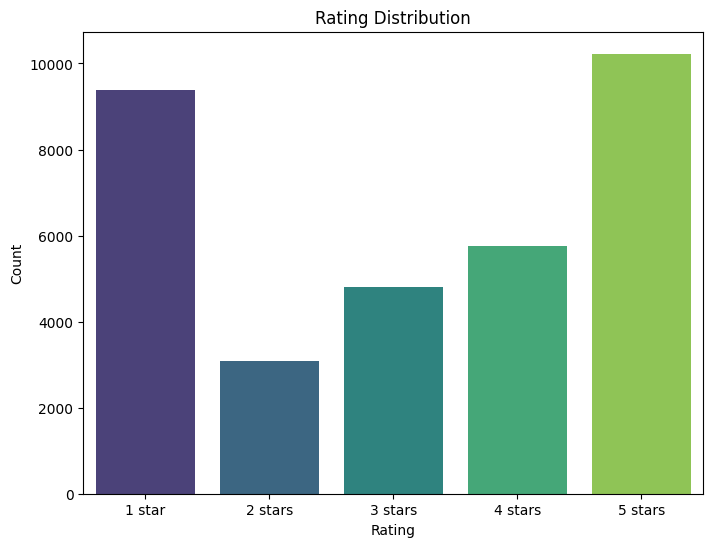

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your pandas DataFrame with 'rating' column
rating_counts = data['rating'].value_counts()

# Define the desired order
ordered_ratings = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']

# Reindex to ensure order and fill missing ratings with 0
rating_counts = rating_counts.reindex(ordered_ratings, fill_value=0)

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [17]:
## labling the rating as positve negative and neutral
def sentiment_extraction(text):
    if text == '3 stars':
        return 'neutral'
    elif text in ['5 stars','4 stars']:
        return 'positive'
    else:
        return 'negative'

In [18]:
data['sentiment_rating'] = data['rating'].apply(sentiment_extraction)

In [19]:
data[['sentiment_rating']].value_counts()

sentiment_rating
positive            16061
negative            12517
neutral              4818
Name: count, dtype: int64

## Further processing text to expand contractions, removing html tags and stopwords

In [20]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Expand contractions
    text = contractions.fix(text)
    # Lowercase, remove URLs, normalize spaces
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [21]:
import time
# Time the process
start_time = time.time()

# Apply initial preprocessing
data['cleaned_review'] = data['cleaned_review'].apply(preprocess_text)

# Batch lemmatization with spaCy pipe
docs = nlp.pipe(data['cleaned_review'])
data['cleaned_review'] = [' '.join([token.lemma_ for token in doc if token.text not in stop_words]) for doc in docs]

end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

Time taken: 46.52 seconds


## Deleting the empty rows after the cleaning process

In [22]:
empty_rows = data['cleaned_review'].isna() | (data['cleaned_review'].str.strip() == '')
num_empty = empty_rows.sum()
print(f"Number of rows with empty values in cleaned_text: {num_empty} out of {len(data)}")
print(f"Percentage: {(num_empty / len(data) * 100):.2f}%")

Number of rows with empty values in cleaned_text: 135 out of 33396
Percentage: 0.40%


In [23]:
data = data[~(empty_rows)]

In [24]:
data.shape

(33261, 13)

## Detecting for other languages apart from english

In [25]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=c24a41f8eaf3431d8656e4e263c3b973e1b8a53a5103830ae292f85792246100
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [26]:
from langdetect import detect

def detect_language(text):
    if not isinstance(text, str) or text.strip() == '':
        return 'unknown'
    try:
        return detect(text)
    except:
        return 'unknown'


data['language'] = data['review'].apply(detect_language)  # Use review_text (raw) for accuracy

# Count languages
language_counts = data['language'].value_counts()
print("Language distribution:")
print(language_counts)
print(f"Percentage English: {(language_counts.get('en', 0) / len(data) * 100):.2f}%")

Language distribution:
language
en         25608
ca          2892
so          1598
de          1086
nl           453
af           351
fr           161
ro           152
it           135
da           125
cy            97
tl            82
no            81
sl            69
pl            47
tr            46
et            38
es            37
id            35
pt            25
fi            24
sv            22
vi            20
sk            18
hr            16
sq            14
cs            12
sw            11
hu             2
unknown        2
lv             1
lt             1
Name: count, dtype: int64
Percentage English: 76.99%


## Need to filter out all the other language reviews and proceed with only english reviews

In [27]:
data_en = data[data['language'] == 'en']
print(f"English rows: {len(data_en)}")

English rows: 25608


## Checking the class distribution

In [28]:
data_en['sentiment_rating'].value_counts()

sentiment_rating
positive    11066
negative    11024
neutral      3518
Name: count, dtype: int64

## Checking review lengths

In [29]:
# Analyze review lengths (optional, for tuning maxlen)
review_lengths = [len(seq.split()) for seq in data_en['cleaned_review']]
print(f"Median review length: {np.median(review_lengths)}")
print(f"90th percentile: {np.percentile(review_lengths, 90)}")

Median review length: 11.0
90th percentile: 40.0


## Fitting a logistic regression model intially for the baseline model scores

Accuracy: 0.75
Precision: 0.78, Recall: 0.75, F1: 0.76


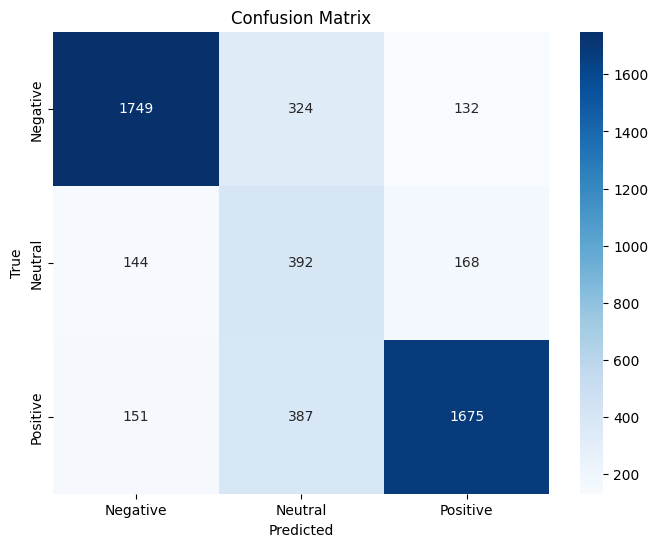

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_en['cleaned_review'])
y = data_en['sentiment_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# Confusion matrix generation
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Naive Bayes Model

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Model
nb = MultinomialNB()

# Hyperparameter tuning
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}  # Smoothing parameter
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_nb = grid_search.best_estimator_
print(f"Best params: {grid_search.best_params_}")

# Predict and evaluate
y_pred = best_nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Naive Bayes - Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Best params: {'alpha': 0.1}
Naive Bayes - Accuracy: 0.77, Precision: 0.75, Recall: 0.77, F1: 0.74


## Support Vector Machine

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best params: {'C': 0.1, 'max_iter': 1000}
SVM - Accuracy: 0.78, Precision: 0.77, Recall: 0.78, F1: 0.77


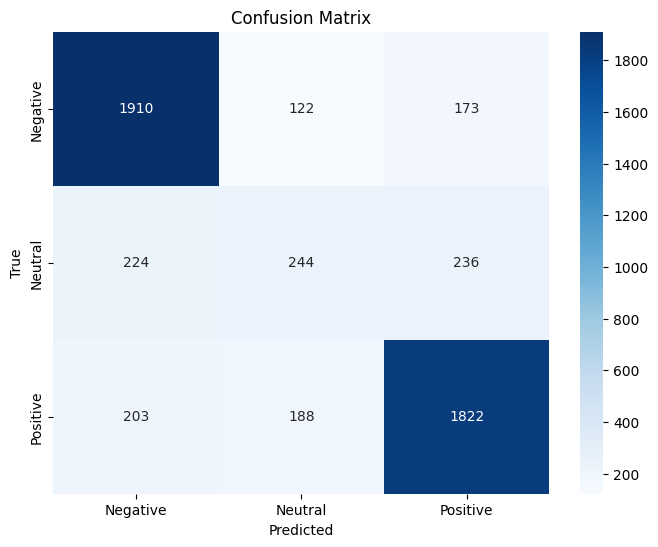

In [33]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Model
svm = LinearSVC(class_weight = 'balanced')

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'max_iter': [1000, 2000]}  # Regularization strength
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
print(f"Best params: {grid_search.best_params_}")

# Predict and evaluate
y_pred = best_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"SVM - Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")


# Confusion matrix generation
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=42)

# Hyperparameter tuning (limited to avoid long runtime)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}  # Trees and depth
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print(f"Best params: {grid_search.best_params_}")

# Predict and evaluate
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Random Forest - Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Best params: {'max_depth': 20, 'n_estimators': 200}
Random Forest - Accuracy: 0.74, Precision: 0.75, Recall: 0.74, F1: 0.75


## LSTM Model

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import tensorflow as tf

# Tokenize and pad
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data_en['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(data_en['cleaned_review'])
X_padded = pad_sequences(X_seq, maxlen=100)
y_encoded = pd.get_dummies(data_en['sentiment_rating'])  # One-hot: negative, neutral, positive

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_encoded.idxmax(axis=1)), y=y_encoded.idxmax(axis=1)
)
class_weight_dict = dict(enumerate(class_weights))

# Define LSTM model for tuning
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(5000, hp.Int('embedding_dim', min_value=64, max_value=256, step=64)))
    model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=128, step=32),
                   dropout=hp.Float('dropout', 0.2, 0.5)))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']  # Simplified, no custom metric
    )
    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_sentiment'
)
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict
)

# Train best model
best_lstm = tuner.get_best_models(num_models=1)[0]
best_lstm.fit(
    X_train, y_train,
    epochs=15,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict
)

# Evaluate
y_pred_prob = best_lstm.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)
acc = accuracy_score(y_test_labels, y_pred)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='macro')
print(f"LSTM - Accuracy: {acc:.2f}")
print(f"Weighted - Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1: {f1_weighted:.2f}")
print(f"Macro - Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")

# Per-class metrics
precision_per_class, recall_per_class, f1_per_class, support = precision_recall_fscore_support(
    y_test_labels, y_pred, average=None, labels=[0, 1, 2]
)
print("\nPer-Class Metrics:")
for i, class_name in enumerate(['negative', 'neutral', 'positive']):
    print(f"{class_name.capitalize()}: Precision={precision_per_class[i]:.2f}, Recall={recall_per_class[i]:.2f}, F1={f1_per_class[i]:.2f} (Support: {support[i]})")

Trial 5 Complete [00h 00m 47s]
val_loss: 0.6414082646369934

Best val_loss So Far: 0.6414082646369934
Total elapsed time: 00h 12m 32s
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


576/576 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8056 - loss: 0.5363 - val_accuracy: 0.7280 - val_loss: 0.6518
Epoch 2/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8253 - loss: 0.4731 - val_accuracy: 0.7271 - val_loss: 0.6876
Epoch 3/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8441 - loss: 0.4152 - val_accuracy: 0.7349 - val_loss: 0.6983
Epoch 4/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8658 - loss: 0.3592 - val_accuracy: 0.7363 - val_loss: 0.7069
Epoch 5/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8798 - loss: 0.3270 - val_accuracy: 0.7417 - val_loss: 0.7496
Epoch 6/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8941 - loss: 0.2865 - val_accuracy: 0.7266 - val_loss: 0.8035
Epoch 7/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9023 - loss: 0.2593 - val_accuracy: 0.7529 - val_loss: 0.8334
Epoch 8/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9131 - loss: 0.2373 - val_accuracy: 0.7573 - val_

## Bi-directional LSTM with GloVe Embeddings

## Glove Setup

In [30]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-10-08 06:38:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-10-08 06:38:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-10-08 06:38:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [31]:
!find /kaggle -name "glove.6B.100d.txt"


/kaggle/working/glove.6B.100d.txt


In [43]:
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.2.2


In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import tensorflow as tf

# Try importing SMOTE; fallback to manual oversampling
# try:
#     from imblearn.over_sampling import SMOTE
#     smote_available = True
#     print("SMOTE imported successfully")
# except ImportError:
#     smote_available = False
#     print("SMOTE import failed. Using manual oversampling.")

#Using Manual Oversampling as the system is failing to install correct version of imblearn

# Verify versions
# try:
#     import sklearn
#     import imblearn
#     import category_encoders
#     import sklearn_compat
#     print("scikit-learn version:", sklearn.__version__)
#     print("imblearn version:", imblearn.__version__)
#     print("category-encoders version:", category_encoders.__version__)
#     print("sklearn-compat version:", sklearn_compat.__version__)
# except ImportError as e:
#     print(f"Version check failed: {e}")

# Clean data
data_en['cleaned_review'] = data_en['cleaned_review'].fillna('')  # Replace NaN
data_en['cleaned_review'] = data_en['cleaned_review'].astype(str)  # Ensure strings

# Verify review lengths
review_lengths = [len(seq.split()) for seq in data_en['cleaned_review']]
print(f"Median review length: {np.median(review_lengths)}")
print(f"90th percentile: {np.percentile(review_lengths, 90)}")

# Tokenize and pad
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data_en['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(data_en['cleaned_review'])
X_padded = pad_sequences(X_seq, maxlen=50)  # Optimized for review lengths
y_encoded = pd.get_dummies(data_en['sentiment_rating'])  # One-hot: negative, neutral, positive

# Verify tokenization
print("Vocabulary size:", len(tokenizer.word_index))
print("Sample sequences:", X_seq[:5])
print("Empty sequences count:", sum(1 for seq in X_seq if len(seq) == 0))

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Reset indices to avoid IndexError
X_train = np.array(X_train)  # Ensure X_train is a numpy array
y_train = y_train.reset_index(drop=True)  # Reset y_train indices to 0–20487

# Oversampling (SMOTE or manual) # Manual only
# if smote_available:
#     smote = SMOTE(random_state=42)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.idxmax(axis=1))
#     y_train_resampled = pd.get_dummies(y_train_resampled)
#     print("SMOTE applied: Balanced training set")
# else:
# Manual oversampling: Triple neutral samples
neutral_idx = y_train[y_train.idxmax(axis=1) == 'neutral'].index
print(f"Neutral indices: {neutral_idx[:5]}")  # Debug indices
print(f"X_train shape: {X_train.shape}")  # Debug X_train size
X_train_neutral = X_train[neutral_idx]
y_train_neutral = y_train.loc[neutral_idx]
oversample_factor = 3
X_train_resampled = np.vstack([X_train] + [X_train_neutral] * oversample_factor)
y_train_resampled = pd.concat([y_train] + [y_train_neutral] * oversample_factor)
print(f"Manual oversampling: Added {len(neutral_idx) * oversample_factor} neutral samples")

# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_encoded.idxmax(axis=1)), y=y_encoded.idxmax(axis=1)
)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict[1] *= 2.0  # Boost neutral weight 2x

# Load GloVe embeddings
def load_glove_embeddings(glove_path, word_index, embedding_dim=100):
    embeddings_index = {}
    with open(glove_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

glove_path = '/kaggle/working/glove.6B.100d.txt'  # Updated path
embedding_matrix = load_glove_embeddings(glove_path, tokenizer.word_index, embedding_dim=100)

# Define LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=100,
        weights=[embedding_matrix],
        trainable=False
    ))
    model.add(Bidirectional(LSTM(
        hp.Int('lstm_units', min_value=32, max_value=64, step=16),
        dropout=hp.Float('dropout', 0.2, 0.5),
        recurrent_dropout=hp.Float('recurrent_dropout', 0.1, 0.4)
    )))
    model.add(Dropout(hp.Float('dense_dropout', 0.1, 0.4)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout2', 0.1, 0.4)))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_sentiment'
)
tuner.search(
    X_train_resampled, y_train_resampled,
    epochs=15,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

# Train best model
best_lstm = tuner.get_best_models(num_models=1)[0]
best_lstm.fit(
    X_train_resampled, y_train_resampled,
    epochs=20,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

# Evaluate
y_pred_prob = best_lstm.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)
acc = accuracy_score(y_test_labels, y_pred)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='macro')
print(f"LSTM - Accuracy: {acc:.2f}")
print(f"Weighted - Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1: {f1_weighted:.2f}")
print(f"Macro - Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")

# Per-class metrics
precision_per_class, recall_per_class, f1_per_class, support = precision_recall_fscore_support(
    y_test_labels, y_pred, average=None, labels=[0, 1, 2]
)
print("\nPer-Class Metrics:")
for i, class_name in enumerate(['negative', 'neutral', 'positive']):
    print(f"{class_name.capitalize()}: Precision={precision_per_class[i]:.2f}, Recall={recall_per_class[i]:.2f}, F1={f1_per_class[i]:.2f} (Support: {support[i]})")

Trial 10 Complete [00h 36m 26s]
val_loss: 0.09702298045158386

Best val_loss So Far: 0.09702298045158386
Total elapsed time: 05h 27m 15s
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


814/814 ━━━━━━━━━━━━━━━━━━━━ 152s 177ms/step - accuracy: 0.6362 - loss: 0.9222 - val_accuracy: 0.9962 - val_loss: 0.1155 - learning_rate: 0.0012
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 143s 175ms/step - accuracy: 0.6370 - loss: 0.9145 - val_accuracy: 0.9934 - val_loss: 0.1120 - learning_rate: 0.0012
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 143s 175ms/step - accuracy: 0.6480 - loss: 0.8974 - val_accuracy: 0.9965 - val_loss: 0.1168 - learning_rate: 0.0012
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 145s 178ms/step - accuracy: 0.6461 - loss: 0.8975 - val_accuracy: 0.9914 - val_loss: 0.1170 - learning_rate: 0.0012
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 143s 176ms/step - accuracy: 0.6496 - loss: 0.8849 - val_accuracy: 0.9962 - val_loss: 0.1165 - learning_rate: 0.0012
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 143s 175ms/step - accuracy: 0.6583 - loss: 0.8645 - val_accuracy: 0.9962 - val_loss: 0.0956 - learning_rate: 6.1534e-04
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 143s 176ms/step - accuracy: 0.6

## Bi-directional LSTM updated

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import tensorflow as tf

# Clean data
data_en['cleaned_review'] = data_en['cleaned_review'].fillna('')  # Replace NaN
data_en['cleaned_review'] = data_en['cleaned_review'].astype(str)  # Ensure strings

# Verify review lengths
# review_lengths = [len(seq.split()) for seq in data_en['cleaned_review']]
# print(f"Median review length: {np.median(review_lengths)}")
# print(f"90th percentile: {np.percentile(review_lengths, 90)}")

# Tokenize and pad, filter empty sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data_en['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(data_en['cleaned_review'])

# Filter out empty sequences
non_empty_idx = [i for i, seq in enumerate(X_seq) if len(seq) > 0]
X_seq = [X_seq[i] for i in non_empty_idx]
data_en_filtered = data_en.iloc[non_empty_idx].reset_index(drop=True)
X_padded = pad_sequences(X_seq, maxlen=50)  # Optimized for review lengths
y_encoded = pd.get_dummies(data_en_filtered['sentiment_rating'])  # One-hot: negative, neutral, positive

# Verify tokenization
print("Vocabulary size:", len(tokenizer.word_index))
print("Sample sequences:", X_seq[:5])
print("Empty sequences count after filtering:", sum(1 for seq in X_seq if len(seq) == 0))
print(f"Filtered dataset size: {len(data_en_filtered)}")

# Stratified split with index reset
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train = np.array(X_train)
y_train = y_train.reset_index(drop=True)

# Manual oversampling: Double neutral samples
neutral_idx = y_train[y_train.idxmax(axis=1) == 'neutral'].index
print(f"Neutral indices: {neutral_idx[:5]}")
print(f"X_train shape: {X_train.shape}")
X_train_neutral = X_train[neutral_idx]
y_train_neutral = y_train.loc[neutral_idx]
oversample_factor = 2
X_train_resampled = np.vstack([X_train, X_train_neutral] * oversample_factor)
y_train_resampled = pd.concat([y_train, y_train_neutral] * oversample_factor)
print(f"Manual oversampling: Added {len(neutral_idx) * oversample_factor} neutral samples")

# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_encoded.idxmax(axis=1)), y=y_encoded.idxmax(axis=1)
)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict[1] *= 1.5  # Neutral weight 1.5x

# Load GloVe embeddings
def load_glove_embeddings(glove_path, word_index, embedding_dim=100):
    embeddings_index = {}
    with open(glove_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    hits = 0
    misses = 0
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print(f"GloVe coverage: {hits} words found, {misses} words missing ({hits/(hits+misses)*100:.2f}% coverage)")
    return embedding_matrix

glove_path = '/kaggle/working/glove.6B.100d.txt'
embedding_matrix = load_glove_embeddings(glove_path, tokenizer.word_index, embedding_dim=100)

# Define LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=100,
        weights=[embedding_matrix],
        trainable=False
    ))
    model.add(Bidirectional(LSTM(
        hp.Int('lstm_units', min_value=16, max_value=32, step=8),
        dropout=hp.Float('dropout', 0.1, 0.3),
        recurrent_dropout=hp.Float('recurrent_dropout', 0.1, 0.3)
    )))
    model.add(Dropout(hp.Float('dense_dropout', 0.1, 0.3)))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout2', 0.1, 0.3)))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_sentiment'
)
tuner.search(
    X_train_resampled, y_train_resampled,
    epochs=10,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

# Build and train model with best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hp)
model.fit(
    X_train_resampled, y_train_resampled,
    epochs=10,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

# Evaluate
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)
acc = accuracy_score(y_test_labels, y_pred)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='macro')
print(f"LSTM - Accuracy: {acc:.2f}")
print(f"Weighted - Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1: {f1_weighted:.2f}")
print(f"Macro - Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")

# Per-class metrics
precision_per_class, recall_per_class, f1_per_class, support = precision_recall_fscore_support(
    y_test_labels, y_pred, average=None, labels=[0, 1, 2]
)
print("\nPer-Class Metrics:")
for i, class_name in enumerate(['negative', 'neutral', 'positive']):
    print(f"{class_name.capitalize()}: Precision={precision_per_class[i]:.2f}, Recall={recall_per_class[i]:.2f}, F1={f1_per_class[i]:.2f} (Support: {support[i]})")

Trial 5 Complete [00h 38m 19s]
val_loss: 0.5089139938354492

Best val_loss So Far: 0.46640196442604065
Total elapsed time: 03h 15m 47s
Epoch 1/10
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 238s 175ms/step - accuracy: 0.3543 - loss: 1.2185 - val_accuracy: 0.6965 - val_loss: 0.6974 - learning_rate: 0.0012
Epoch 2/10
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 227s 173ms/step - accuracy: 0.5507 - loss: 1.0204 - val_accuracy: 0.6900 - val_loss: 0.6886 - learning_rate: 0.0012
Epoch 3/10
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 226s 173ms/step - accuracy: 0.5786 - loss: 0.9765 - val_accuracy: 0.7489 - val_loss: 0.6197 - learning_rate: 0.0012
Epoch 4/10
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 231s 177ms/step - accuracy: 0.5988 - loss: 0.9381 - val_accuracy: 0.7575 - val_loss: 0.5893 - learning_rate: 0.0012
Epoch 5/10
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 233s 178ms/step - accuracy: 0.6201 - loss: 0.9053 - val_accuracy: 0.7827 - val_loss: 0.5511 - learning_rate: 0.0012
Epoch 6/10
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 233s 178ms/step - accuracy: 0.623

## Updated bidirectional LSTM with GloVe embeddings

Trial 5 Complete [00h 41m 36s]
val_loss: 0.5028231143951416

Best val_loss So Far: 0.5028231143951416
Total elapsed time: 03h 26m 39s
Epoch 1/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 260s 192ms/step - accuracy: 0.3521 - loss: 1.2319 - val_accuracy: 0.7133 - val_loss: 0.6865 - learning_rate: 0.0011
Epoch 2/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 250s 191ms/step - accuracy: 0.5353 - loss: 1.0514 - val_accuracy: 0.7477 - val_loss: 0.6289 - learning_rate: 0.0011
Epoch 3/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 250s 191ms/step - accuracy: 0.5546 - loss: 1.0000 - val_accuracy: 0.7453 - val_loss: 0.6321 - learning_rate: 0.0011
Epoch 4/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 251s 192ms/step - accuracy: 0.5767 - loss: 0.9757 - val_accuracy: 0.7644 - val_loss: 0.5902 - learning_rate: 0.0011
Epoch 5/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 252s 192ms/step - accuracy: 0.5938 - loss: 0.9450 - val_accuracy: 0.7709 - val_loss: 0.5831 - learning_rate: 0.0011
Epoch 6/10
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 251s 191ms/step - accuracy: 0.6041

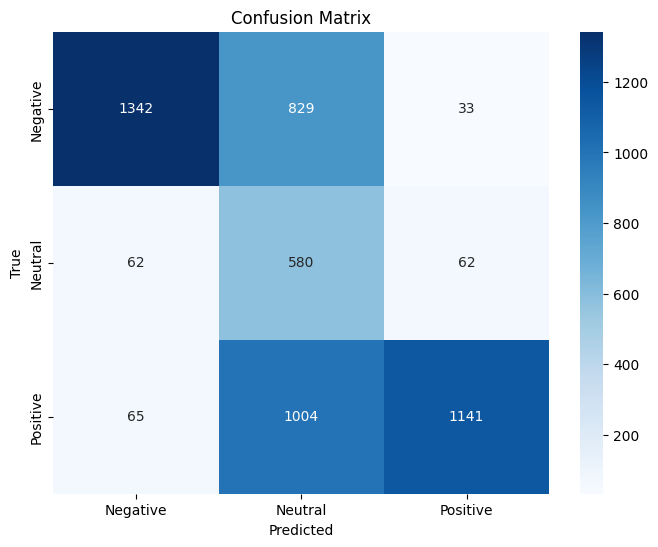

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data
data_en['cleaned_review'] = data_en['cleaned_review'].fillna('')  # Replace NaN
data_en['cleaned_review'] = data_en['cleaned_review'].astype(str)  # Ensure strings

# Verify review lengths
review_lengths = [len(seq.split()) for seq in data_en['cleaned_review']]
print(f"Median review length: {np.median(review_lengths)}")
print(f"90th percentile: {np.percentile(review_lengths, 90)}")

# Tokenize and pad, filter empty sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data_en['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(data_en['cleaned_review'])

# Filter out empty sequences
non_empty_idx = [i for i, seq in enumerate(X_seq) if len(seq) > 0]
X_seq = [X_seq[i] for i in non_empty_idx]
data_en_filtered = data_en.iloc[non_empty_idx].reset_index(drop=True)
X_padded = pad_sequences(X_seq, maxlen=50)  # Optimized for review lengths
y_encoded = pd.get_dummies(data_en_filtered['sentiment_rating'])  # One-hot: negative, neutral, positive

# Verify tokenization
print("Vocabulary size:", len(tokenizer.word_index))
print("Sample sequences:", X_seq[:5])
print("Empty sequences count after filtering:", sum(1 for seq in X_seq if len(seq) == 0))
print(f"Filtered dataset size: {len(data_en_filtered)}")

# Stratified split with index reset
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train = np.array(X_train)
y_train = y_train.reset_index(drop=True)

# Manual oversampling: Double neutral samples
neutral_idx = y_train[y_train.idxmax(axis=1) == 'neutral'].index
print(f"Neutral indices: {neutral_idx[:5]}")
print(f"X_train shape: {X_train.shape}")
X_train_neutral = X_train[neutral_idx]
y_train_neutral = y_train.loc[neutral_idx]
oversample_factor = 2
X_train_resampled = np.vstack([X_train, X_train_neutral] * oversample_factor)
y_train_resampled = pd.concat([y_train, y_train_neutral] * oversample_factor)
print(f"Manual oversampling: Added {len(neutral_idx) * oversample_factor} neutral samples")

# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_encoded.idxmax(axis=1)), y=y_encoded.idxmax(axis=1)
)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict[1] *= 1.5  # Neutral weight 1.5x

# Load GloVe embeddings
def load_glove_embeddings(glove_path, word_index, embedding_dim=100):
    embeddings_index = {}
    with open(glove_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    hits = 0
    misses = 0
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print(f"GloVe coverage: {hits} words found, {misses} words missing ({hits/(hits+misses)*100:.2f}% coverage)")
    return embedding_matrix

glove_path = '/kaggle/working/glove.6B.100d.txt'
embedding_matrix = load_glove_embeddings(glove_path, tokenizer.word_index, embedding_dim=100)

# Define LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=100,
        weights=[embedding_matrix],
        trainable=False
    ))
    model.add(Bidirectional(LSTM(
        hp.Int('lstm_units', min_value=16, max_value=32, step=8),
        dropout=hp.Float('dropout', 0.1, 0.3),
        recurrent_dropout=hp.Float('recurrent_dropout', 0.1, 0.3)
    )))
    model.add(Dropout(hp.Float('dense_dropout', 0.1, 0.3)))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout2', 0.1, 0.3)))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='lstm_sentiment'
)
tuner.search(
    X_train_resampled, y_train_resampled,
    epochs=10,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

# Build and train model with best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hp)
model.fit(
    X_train_resampled, y_train_resampled,
    epochs=10,
    validation_split=0.1,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

# Evaluate
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)
acc = accuracy_score(y_test_labels, y_pred)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='macro')
print(f"LSTM - Accuracy: {acc:.2f}")
print(f"Weighted - Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1: {f1_weighted:.2f}")
print(f"Macro - Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1: {f1_macro:.2f}")

# Per-class metrics
precision_per_class, recall_per_class, f1_per_class, support = precision_recall_fscore_support(
    y_test_labels, y_pred, average=None, labels=[0, 1, 2]
)
print("\nPer-Class Metrics:")
for i, class_name in enumerate(['negative', 'neutral', 'positive']):
    print(f"{class_name.capitalize()}: Precision={precision_per_class[i]:.2f}, Recall={recall_per_class[i]:.2f}, F1={f1_per_class[i]:.2f} (Support: {support[i]})")

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## CNN Model

In [33]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

def build_cnn_model(hp):
    model = Sequential()
    model.add(Embedding(5000, hp.Int('embedding_dim', min_value=64, max_value=256, step=64)))
    model.add(Conv1D(hp.Int('filters', min_value=64, max_value=256, step=64), kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Use same tuner/search as LSTM
tuner = RandomSearch(build_cnn_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=5, validation_split=0.1)

best_cnn = tuner.get_best_models(num_models=1)[0]
best_cnn.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

# Evaluate (same as LSTM)
y_pred_prob = best_cnn.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)
acc = accuracy_score(y_test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='macro')
print(f"CNN - Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.8092682957649231

Best val_accuracy So Far: 0.8102439045906067
Total elapsed time: 00h 01m 19s
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


577/577 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9269 - loss: 0.2120 - val_accuracy: 0.7966 - val_loss: 0.5920
Epoch 2/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9561 - loss: 0.1337 - val_accuracy: 0.8005 - val_loss: 0.6549
Epoch 3/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.0993 - val_accuracy: 0.7995 - val_loss: 0.7466
Epoch 4/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9749 - loss: 0.0759 - val_accuracy: 0.8029 - val_loss: 0.8267
Epoch 5/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9788 - loss: 0.0627 - val_accuracy: 0.7941 - val_loss: 0.9064
Epoch 6/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9801 - loss: 0.0593 - val_accuracy: 0.7888 - val_loss: 0.9773
Epoch 7/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0549 - val_accuracy: 0.8000 - val_loss: 1.0644
Epoch 8/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.0529 - val_accuracy: 0.7917 - val_

## BERT

In [33]:
import pandas as pd
import numpy as np
import transformers
import datasets  # Added for version checking
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import optuna
import torch
import warnings
import logging
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info(f"Transformers version: {transformers.__version__}")  # 4.52.4
logger.info(f"Datasets version: {datasets.__version__}")  # 3.6.0
logger.info(f"Torch version: {torch.__version__}")  # 2.6.0+cu124
logger.info(f"GPU available: {torch.cuda.is_available()}")

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Prepare data
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def tokenize(examples):
    return tokenizer(examples['cleaned_review'], padding='max_length', truncation=True, max_length=64)  # Reduced from 128

# Convert sentiment labels to integers (positive: 2, negative: 0, neutral: 1)
def preprocess_data(df):
    label_map = {'positive': 2, 'negative': 0, 'neutral': 1}
    df = df.copy()
    df['labels'] = df['sentiment_rating'].map(label_map)
    if df['labels'].isnull().any():
        logger.warning("Found NaN labels in dataset")
        df = df.dropna(subset=['labels'])
    return df[['cleaned_review', 'labels']]

logger.info("Preprocessing dataset")
data_processed = preprocess_data(data_en)
dataset = Dataset.from_pandas(data_processed)
dataset = dataset.map(tokenize, batched=True)
train_test = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test['train']
test_dataset = train_test['test']

# Define compute_metrics for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='macro')
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted
    }

# Hyperparameter tuning with Optuna
def objective(trial):
    logger.info(f"Starting Optuna trial {trial.number}")
    training_args = TrainingArguments(
        output_dir=f'./results/trial_{trial.number}',
        num_train_epochs=trial.suggest_int('num_train_epochs', 2, 3),
        per_device_train_batch_size=trial.suggest_categorical('batch_size', [4, 8]),
        per_device_eval_batch_size=4,
        gradient_accumulation_steps=trial.suggest_int('gradient_accumulation_steps', 2, 4),
        learning_rate=trial.suggest_float('learning_rate', 1e-5, 3e-5, log=True),
        eval_strategy='epoch',
        save_strategy='epoch',
        load_best_model_at_end=True,
        metric_for_best_model='f1_weighted',
        seed=42,
        logging_dir=f'./logs/trial_{trial.number}',
        logging_strategy='epoch',
        report_to='none',
        fp16=True  # Mixed precision for memory
    )
    model = AutoModelForSequenceClassification.from_pretrained(
        'nlptown/bert-base-multilingual-uncased-sentiment',
        num_labels=3,
        ignore_mismatched_sizes=True
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )
    trainer.train()
    eval_results = trainer.evaluate()
    logger.info(f"Trial {trial.number} Weighted F1: {eval_results['eval_f1_weighted']:.4f}")
    torch.cuda.empty_cache()  # Clear memory after trial
    return eval_results['eval_f1_weighted']

# Run Optuna optimization
logger.info("Starting Optuna optimization")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2)  # Reduced trials for GPU time
best_params = study.best_params
logger.info(f"Best parameters: {best_params}")

# Train with best hyperparameters
training_args = TrainingArguments(
    output_dir='./results/final',
    num_train_epochs=best_params['num_train_epochs'],
    per_device_train_batch_size=best_params['batch_size'],
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=best_params['gradient_accumulation_steps'],
    learning_rate=best_params['learning_rate'],
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1_weighted',
    seed=42,
    logging_dir='./logs/final',
    logging_strategy='epoch',
    report_to='none',
    fp16=True
)
model = AutoModelForSequenceClassification.from_pretrained(
    'nlptown/bert-base-multilingual-uncased-sentiment',
    num_labels=3,
    ignore_mismatched_sizes=True
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
logger.info("Starting final training")
trainer.train()

# Evaluate
results = trainer.evaluate()
print(f"BERT - Eval Loss: {results['eval_loss']:.2f}, Accuracy: {results['accuracy']:.2f}, "
      f"Weighted - Precision: {results['precision_weighted']:.2f}, Recall: {results['recall_weighted']:.2f}, F1: {results['f1_weighted']:.2f}, "
      f"Macro - Precision: {results['precision']:.2f}, Recall: {results['recall']:.2f}, F1: {results['f1']:.2f}")

# Sample predictions
predictions = trainer.predict(test_dataset)
sample_preds = np.argmax(predictions.predictions, axis=1)[:5]
sample_labels = predictions.label_ids[:5]
label_map = {2: 'positive', 0: 'negative', 1: 'neutral'}
print("Sample predictions:", [label_map[p] for p in sample_preds])
print("Sample true labels:", [label_map[l] for l in sample_labels])

# Confusion matrix
cm = confusion_matrix(predictions.label_ids, np.argmax(predictions.predictions, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/25598 [00:00<?, ? examples/s]

[I 2025-10-08 06:44:57,174] A new study created in memory with name: no-name-042681d4-fa69-40ad-b87a-8f6540be1cac


model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Precision Weighted,Recall Weighted,F1 Weighted
1,0.591300,0.542772,0.789258,0.685937,0.655852,0.656738,0.761777,0.789258,0.768920
2,0.451000,0.526952,0.808594,0.720599,0.699234,0.705195,0.793175,0.808594,0.798664


[I 2025-10-08 07:05:40,578] Trial 0 finished with value: 0.7986641087620863 and parameters: {'num_train_epochs': 2, 'batch_size': 4, 'gradient_accumulation_steps': 2, 'learning_rate': 2.946767352171541e-05}. Best is trial 0 with value: 0.7986641087620863.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Precision Weighted,Recall Weighted,F1 Weighted
1,0.577200,0.533920,0.792969,0.690665,0.659182,0.660234,0.766448,0.792969,0.772743
2,0.466900,0.515934,0.801172,0.707810,0.684235,0.689246,0.782746,0.801172,0.788552
3,0.386000,0.529624,0.807031,0.717013,0.700289,0.705411,0.793229,0.807031,0.798585


[I 2025-10-08 07:24:10,161] Trial 1 finished with value: 0.7985849591969048 and parameters: {'num_train_epochs': 3, 'batch_size': 8, 'gradient_accumulation_steps': 4, 'learning_rate': 2.5496487142838195e-05}. Best is trial 0 with value: 0.7986641087620863.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Precision Weighted,Recall Weighted,F1 Weighted
1,0.589200,0.542088,0.789648,0.686388,0.673431,0.676319,0.772272,0.789648,0.779202
2,0.445000,0.528437,0.806641,0.717886,0.699346,0.704855,0.792292,0.806641,0.797683


KeyError: 'accuracy'

BERT - Eval Loss: 0.53, Accuracy: 0.81, Weighted - Precision: 0.79, Recall: 0.81, F1: 0.80, Macro - Precision: 0.72, Recall: 0.70, F1: 0.70
Sample predictions: ['neutral', 'negative', 'negative', 'positive', 'positive']
Sample true labels: ['neutral', 'negative', 'positive', 'positive', 'positive']


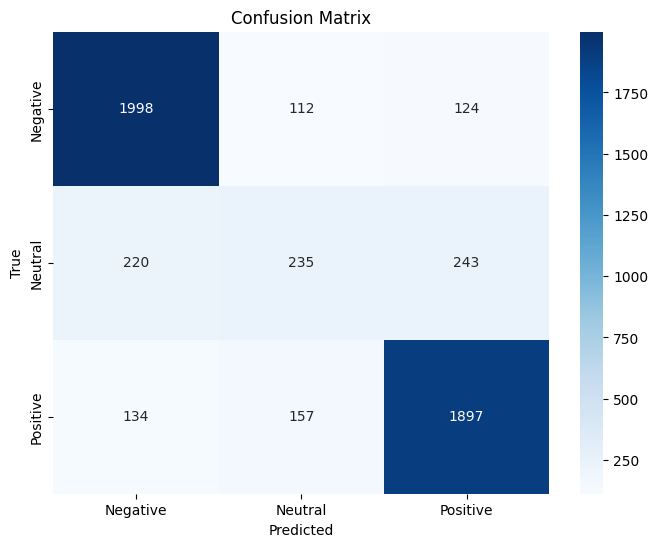

In [34]:
# Evaluate
results = trainer.evaluate()
print(f"BERT - Eval Loss: {results['eval_loss']:.2f}, Accuracy: {results['eval_accuracy']:.2f}, "
      f"Weighted - Precision: {results['eval_precision_weighted']:.2f}, Recall: {results['eval_recall_weighted']:.2f}, F1: {results['eval_f1_weighted']:.2f}, "
      f"Macro - Precision: {results['eval_precision']:.2f}, Recall: {results['eval_recall']:.2f}, F1: {results['eval_f1']:.2f}")

# Sample predictions for validation
predictions = trainer.predict(test_dataset)
sample_preds = np.argmax(predictions.predictions, axis=1)[:5]
sample_labels = predictions.label_ids[:5]
label_map = {2: 'positive', 0: 'negative', 1: 'neutral'}
print("Sample predictions:", [label_map[p] for p in sample_preds])
print("Sample true labels:", [label_map[l] for l in sample_labels])

# Confusion matrix
cm = confusion_matrix(predictions.label_ids, np.argmax(predictions.predictions, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Analysing to see if the rating system labling is inherently false, when we labelled 3 star as neutral, maybe some of them may be positive and some negative. The below code corrects such wrong labelling and reruns the BERT code

In [30]:
data_en.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,has_special_chars,cleaned_review,sentiment_rating,language
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",1 star,False,"look like someone spit food ? normal transaction , everyone chill polite , want eat . try think milky white / clear substance food , * * * sure come back .",negative,en
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",4 stars,False,"would mcdonald . far food atmosphere go . staff make difference . friendly , accommodate always smile . make pleasant experience many fast food place .",positive,en
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day and the manager told me she wasnï¿,1 star,True,make mobile order get speaker check . line move leave otherwise late work . never get refund app . call say could get money back person stick system . go person next day manager tell,negative,en
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5 stars,True,mc . crispy chicken sandwich customer service quick p,positive,en
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they either need to pay close attention to the order being made , understand English or they need not to work at a drive thru",1 star,False,"repeat order 3 time drive thru , still manage mess , suppose large meal double filet fish large fry , cheese . wrong , either need pay close attention order make , understand english need work drive thru",negative,en


In [33]:
three_star.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,has_special_chars,cleaned_review,sentiment_rating,language
13,14,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,"Today, i was disappointed in that restaurant #11853 did not get me my FULL order, meaning I did not receive my condiments for my big breakfast with hot cakes. No butter, no syrup, and no utensils. Luckily this was a hiccup and not a regular thing. Oh, and the egg was half the size of the sausage.",3 stars,False,"today , disappoint restaurant # 11853 get full order , mean receive condiment big breakfast hot cake . butter , syrup , utensil . luckily hiccup regular thing . oh , egg half size sausage .",neutral,en
42,43,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,"Me and my girlfriend came tonight to pick up our food after 11pm for a mobile order, they need a better system if you are walking on foot. The food tasted great, loved the McDonald's deal ordering from the app.",3 stars,False,"girlfriend come tonight pick food 11 pm mobile order , need well system walk foot . food taste great , love mcdonald 's deal order app .",neutral,en
53,54,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,They got our order correct and didn't cut me off before I had finished ordering our food at the speaker. I could actually understand our order taker. I don't know if it really gets any better than that at a fast food place anymore.,3 stars,False,get order correct cut finish order food speaker . could actually understand order taker . know really get well fast food place anymore .,neutral,en
64,65,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 years ago,They run out of fry containers and constantly forget sauces. The dining room is still closed for some reason so have fun getting back in line for a sauce. Sometimes the fries aren't great which is a huge part of McDonald's. Come on guys...,3 stars,False,run fry container constantly forget sauce . dining room still close reason fun get back line sauce . sometimes fry great huge part mcdonald 's . come guy ...,neutral,en
71,72,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,"My nuggets were way to salty and crunchy which means to had been sitting there a while, cashier cut me off in the middle of my order but was nice and polite when I addressed it and fries where kinda cold but another then good place to get food at an affordable price",3 stars,False,"nugget way salty crunchy mean sit , cashier cut middle order nice polite address fry kind cold another good place get food affordable price",neutral,en


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of 3-star reviews: 3515


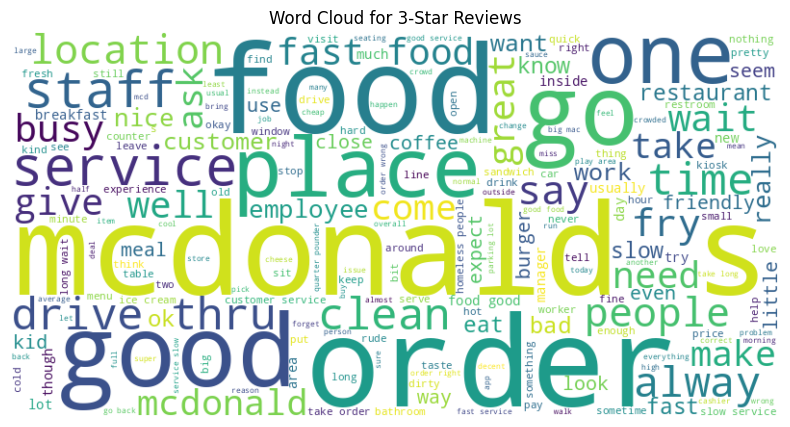

VADER Re-Label Distribution for 3-Star Reviews:
 vader_sentiment
positive    1875
neutral      993
negative     647
Name: count, dtype: int64


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Step 1: Extract 3-star reviews (assuming your original data has 'rating' column)
# Load original dataset if needed
# data = pd.read_csv('mcdonalds_reviews.csv', encoding='latin-1')
three_star = data_en[data_en['rating'] == '3 stars'].copy()  # Assuming 'rating' is numeric 1-5
print(f"Number of 3-star reviews: {len(three_star)}")

# Step 2: Analyze themes with word cloud
text = ' '.join(three_star['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 3-Star Reviews')
plt.show()

# Step 3: Re-label 3-star reviews using VADER (rule-based sentiment analyzer)
analyzer = SentimentIntensityAnalyzer()
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

three_star['vader_sentiment'] = three_star['cleaned_review'].apply(vader_sentiment)
print("VADER Re-Label Distribution for 3-Star Reviews:\n", three_star['vader_sentiment'].value_counts())

# Step 4: Re-label the original dataset
# data_re_labeled = data.copy()
# three_star_mask = data_re_labeled['rating'] == 3
# data_re_labeled.loc[three_star_mask, 'sentiment_rating'] = three_star['vader_sentiment']

# Step 5: Re-train BERT on re-labeled data (adapted from your code)
# ... (Insert your BERT code here, using data_re_labeled instead of data_en)
# For brevity, assume you re-run the BERT training with data_re_labeled['cleaned_review'] and data_re_labeled['sentiment_rating']
# After re-training, evaluate and compare F1 scores

# Step 6: Compare original vs. re-labeled performance
# Assume original_F1 and re_labeled_F1 are from your evaluations
# print("Original Macro F1: 0.70, Re-labeled Macro F1: [your new score]")

In [35]:
# Step 4: Re-label the original dataset
data_re_labeled = data_en.copy()
three_star_mask = data_re_labeled['rating'] == '3 stars'
data_re_labeled.loc[three_star_mask, 'sentiment_rating'] = three_star['vader_sentiment']

In [36]:
data_re_labeled.sentiment_rating.value_counts()

sentiment_rating
positive    12934
negative    11666
neutral       993
Name: count, dtype: int64

## Rerun BERT

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/25593 [00:00<?, ? examples/s]

[I 2025-10-08 09:31:02,961] A new study created in memory with name: no-name-440d5b0c-9705-4a02-b41f-eb5c7d63a4ef


model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Precision Weighted,Recall Weighted,F1 Weighted
1,0.434500,0.366193,0.858175,0.748983,0.627369,0.641582,0.849830,0.858175,0.848323
2,0.325700,0.368865,0.862864,0.724099,0.660605,0.678283,0.856080,0.862864,0.857291
3,0.272000,0.369537,0.869310,0.723689,0.668613,0.686183,0.861468,0.869310,0.864144


[I 2025-10-08 09:49:53,822] Trial 0 finished with value: 0.8641435374419492 and parameters: {'num_train_epochs': 3, 'batch_size': 8, 'gradient_accumulation_steps': 2, 'learning_rate': 1.1315555457259602e-05}. Best is trial 0 with value: 0.8641435374419492.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Precision Weighted,Recall Weighted,F1 Weighted
1,0.418200,0.361086,0.859348,0.727668,0.644715,0.662528,0.850887,0.859348,0.852046
2,0.298700,0.368780,0.865208,0.716785,0.684003,0.696100,0.861929,0.865208,0.862267
3,0.211500,0.387773,0.869506,0.723952,0.692013,0.704948,0.864827,0.869506,0.866728


[I 2025-10-08 10:08:43,229] Trial 1 finished with value: 0.8667283752899886 and parameters: {'num_train_epochs': 3, 'batch_size': 8, 'gradient_accumulation_steps': 2, 'learning_rate': 2.5475515717296368e-05}. Best is trial 1 with value: 0.8667283752899886.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Precision Weighted,Recall Weighted,F1 Weighted
1,0.418200,0.361086,0.859348,0.727668,0.644715,0.662528,0.850887,0.859348,0.852046
2,0.298700,0.368780,0.865208,0.716785,0.684003,0.696100,0.861929,0.865208,0.862267
3,0.211500,0.387773,0.869506,0.723952,0.692013,0.704948,0.864827,0.869506,0.866728


BERT - Eval Loss: 0.39, Accuracy: 0.87, Weighted - Precision: 0.86, Recall: 0.87, F1: 0.87, Macro - Precision: 0.72, Recall: 0.69, F1: 0.70
Sample predictions: ['negative', 'positive', 'positive', 'negative', 'positive']
Sample true labels: ['negative', 'negative', 'positive', 'negative', 'positive']


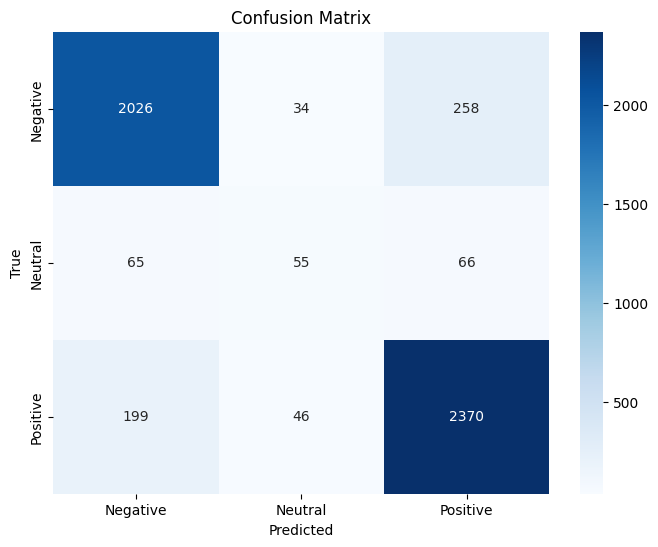

In [37]:
import pandas as pd
import numpy as np
import transformers
import datasets  # Added for version checking
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import optuna
import torch
import warnings
import logging
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info(f"Transformers version: {transformers.__version__}")  # 4.52.4
logger.info(f"Datasets version: {datasets.__version__}")  # 3.6.0
logger.info(f"Torch version: {torch.__version__}")  # 2.6.0+cu124
logger.info(f"GPU available: {torch.cuda.is_available()}")

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Prepare data
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def tokenize(examples):
    return tokenizer(examples['cleaned_review'], padding='max_length', truncation=True, max_length=64)  # Reduced from 128

# Convert sentiment labels to integers (positive: 2, negative: 0, neutral: 1)
def preprocess_data(df):
    label_map = {'positive': 2, 'negative': 0, 'neutral': 1}
    df = df.copy()
    df['labels'] = df['sentiment_rating'].map(label_map)
    if df['labels'].isnull().any():
        logger.warning("Found NaN labels in dataset")
        df = df.dropna(subset=['labels'])
    return df[['cleaned_review', 'labels']]

logger.info("Preprocessing dataset")
data_processed = preprocess_data(data_re_labeled)
dataset = Dataset.from_pandas(data_processed)
dataset = dataset.map(tokenize, batched=True)
train_test = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test['train']
test_dataset = train_test['test']

# Define compute_metrics for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='macro')
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted
    }

# Hyperparameter tuning with Optuna
def objective(trial):
    logger.info(f"Starting Optuna trial {trial.number}")
    training_args = TrainingArguments(
        output_dir=f'./results/trial_{trial.number}',
        num_train_epochs=trial.suggest_int('num_train_epochs', 2, 3),
        per_device_train_batch_size=trial.suggest_categorical('batch_size', [4, 8]),
        per_device_eval_batch_size=4,
        gradient_accumulation_steps=trial.suggest_int('gradient_accumulation_steps', 2, 4),
        learning_rate=trial.suggest_float('learning_rate', 1e-5, 3e-5, log=True),
        eval_strategy='epoch',
        save_strategy='epoch',
        load_best_model_at_end=True,
        metric_for_best_model='f1_weighted',
        seed=42,
        logging_dir=f'./logs/trial_{trial.number}',
        logging_strategy='epoch',
        report_to='none',
        fp16=True  # Mixed precision for memory
    )
    model = AutoModelForSequenceClassification.from_pretrained(
        'nlptown/bert-base-multilingual-uncased-sentiment',
        num_labels=3,
        ignore_mismatched_sizes=True
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )
    trainer.train()
    eval_results = trainer.evaluate()
    logger.info(f"Trial {trial.number} Weighted F1: {eval_results['eval_f1_weighted']:.4f}")
    torch.cuda.empty_cache()  # Clear memory after trial
    return eval_results['eval_f1_weighted']

# Run Optuna optimization
logger.info("Starting Optuna optimization")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2)  # Reduced trials for GPU time
best_params = study.best_params
logger.info(f"Best parameters: {best_params}")

# Train with best hyperparameters
training_args = TrainingArguments(
    output_dir='./results/final',
    num_train_epochs=best_params['num_train_epochs'],
    per_device_train_batch_size=best_params['batch_size'],
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=best_params['gradient_accumulation_steps'],
    learning_rate=best_params['learning_rate'],
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1_weighted',
    seed=42,
    logging_dir='./logs/final',
    logging_strategy='epoch',
    report_to='none',
    fp16=True
)
model = AutoModelForSequenceClassification.from_pretrained(
    'nlptown/bert-base-multilingual-uncased-sentiment',
    num_labels=3,
    ignore_mismatched_sizes=True
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
logger.info("Starting final training")
trainer.train()


# Evaluate
results = trainer.evaluate()
print(f"BERT - Eval Loss: {results['eval_loss']:.2f}, Accuracy: {results['eval_accuracy']:.2f}, "
      f"Weighted - Precision: {results['eval_precision_weighted']:.2f}, Recall: {results['eval_recall_weighted']:.2f}, F1: {results['eval_f1_weighted']:.2f}, "
      f"Macro - Precision: {results['eval_precision']:.2f}, Recall: {results['eval_recall']:.2f}, F1: {results['eval_f1']:.2f}")

# Sample predictions for validation
predictions = trainer.predict(test_dataset)
sample_preds = np.argmax(predictions.predictions, axis=1)[:5]
sample_labels = predictions.label_ids[:5]
label_map = {2: 'positive', 0: 'negative', 1: 'neutral'}
print("Sample predictions:", [label_map[p] for p in sample_preds])
print("Sample true labels:", [label_map[l] for l in sample_labels])

# Confusion matrix
cm = confusion_matrix(predictions.label_ids, np.argmax(predictions.predictions, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()